In [2]:
# Imports
import numpy as np
from matplotlib import pyplot as plt
      
# Each row is a training example, each column is a feature  [X1, X2, X3]
X=np.array(([0,3,0,0],[0,4,3,1],[1,0,3,3], [1,2,3,4]), dtype=float)
y=np.array(([0], [1], [1], [1]), dtype=float)

# Define useful functions    

# Activation function
def sigmoid(t):
    return np.divide(1, (1+np.exp(-t)))

# Derivative of sigmoid
def sigmoid_derivative(p):
    return p * (1 - p)

class NeuralNetwork:
    
    def __init__(self, x, y):
        self.input    = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y        = y
        self.output   = np.zeros(self.y.shape)
        print (self.input)
        print (self.weights1)
        print(np.dot(self.input, self.weights1))
        
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        return self.output
        
    def backprop(self):
        # application of the chain rule to find derivative of the loss function
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output)* sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))
        
        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2
        
    def train(self, X, y):
        self.output = self.feedforward()
        self.backprop()
        
    def predict(self, p):
        self.input = p
        prediction = self.feedforward()
        return prediction

    

[[0. 3. 0. 0.]
 [0. 4. 3. 1.]
 [1. 0. 3. 3.]
 [1. 2. 3. 4.]]
[[0.9692476  0.35754078 0.41710995 0.03260662]
 [0.05382717 0.70138984 0.28112349 0.01669688]
 [0.81286648 0.32963897 0.07004335 0.23433253]
 [0.80055317 0.90999843 0.72103689 0.19038801]]
[[0.16148152 2.10416953 0.84337046 0.05009063]
 [3.45446132 4.70447471 2.05566089 0.96017311]
 [5.80950658 4.07645298 2.79035066 1.30676824]
 [6.7177141  6.3892311  4.07363452 1.53055   ]]
4


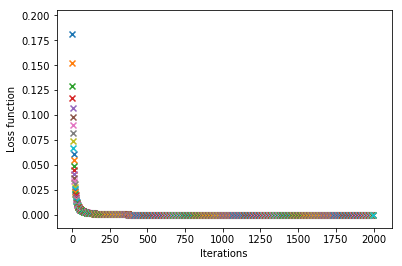

Prediction for [1,2,3,4] is [0.99558749]


In [3]:
NN = NeuralNetwork(X,y)
from matplotlib import pyplot as plt
print (X.shape[1])

for i in range(2000): # trains the NN 1,000 times
    '''
    if i % 100 ==0: 
        print ("for iteration # " + str(i) + "\n")
        print ("Input : \n" + str(X))
        print ("Actual Output: \n" + str(y))
        print ("Predicted Output: \n" + str(NN.feedforward()))
        print ("Loss: \n" + str(np.mean(np.square(y - NN.feedforward())))) # mean sum squared loss
        print ("\n")
    '''
    plt.scatter(i, np.mean(np.square(y - NN.feedforward())), marker = 'x')

    
    NN.train(X, y)

plt.xlabel('Iterations')
plt.ylabel('Loss function')
plt.show()

print ('Prediction for [1,2,3,4] is', NN.predict(np.array(([1,2,3,4]), dtype = float)))
